In [39]:
# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline 
from scipy.integrate import odeint


a11 = 2
a12 = 0.3
a21 = 0.3
a22 = 1

def dC_dt(C, t):
    return [a11*C[0] + a12*C[1], a21*C[0] + a22*C[1]]

ts = np.linspace(0, 1, 10)
C0 = [0.0, 1.0]
Cs = odeint(dC_dt, C0, ts)
prey = Cs[:,0]
predators = Cs[:,1]

In [49]:
Cs

array([[0.        , 1.        ],
       [0.03940623, 1.11816362],
       [0.09330141, 1.25184273],
       [0.16591218, 1.40344166],
       [0.26261461, 1.5758154 ],
       [0.39023855, 1.77236809],
       [0.55745235, 1.99717536],
       [0.77524776, 2.25513593],
       [1.05755226, 2.55216055],
       [1.42200133, 2.89540723]])

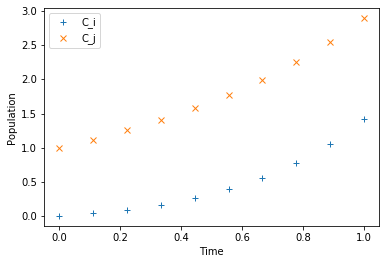

In [40]:
plt.plot(ts, prey, "+", label="C_i")
plt.plot(ts, predators, "x", label="C_j")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

In [41]:
# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline 
from scipy.integrate import solve_ivp


a11 = 2
a12 = 0.3
a21 = 0.3
a22 = 1


def dz_dt(t, z, a, b, c, d):
    x, y = z
    return [a11*x + a12*y, a21*x + a22*y]

sol = solve_ivp(dz_dt, [0, 1], [0.0, 1.0], args=(a11, a12, a21, a22),
                dense_output=True)


TypeError: 'OdeSolution' object is not subscriptable

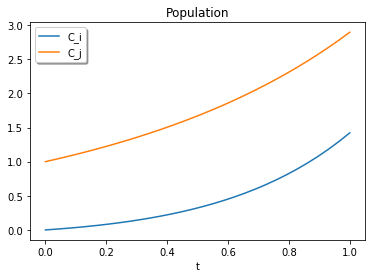

In [42]:
t = np.linspace(0, 1, 30)
z = sol.sol(t)
import matplotlib.pyplot as plt
plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['C_i', 'C_j'], shadow=True)
plt.title('Population')
plt.show()

In [62]:
z.T[:,1]

array([1.        , 1.03514021, 1.07163423, 1.1095421 , 1.14892677,
       1.18985503, 1.23239751, 1.27662866, 1.32262676, 1.3704741 ,
       1.42026052, 1.47207594, 1.52601463, 1.58217805, 1.64067486,
       1.70162087, 1.76513912, 1.8313598 , 1.90042032, 1.97246524,
       2.04764634, 2.12612255, 2.20806057, 2.29364538, 2.38307028,
       2.47653917, 2.57426992, 2.67649436, 2.7834583 , 2.89542153])

In [43]:
#Comparison 
from scipy.linalg import eig, expm 

def propagator(dt):
    H = np.array([[a11, a12], [a21, a22]])
    Ct = C0
    p_ij = expm(H*dt).dot(Ct)
    return p_ij


In [16]:
propagator(1)

array([1.42200118, 2.89540719])

In [44]:
resp1 = []
resp2 = []
for t in ts:
    resp1.append(propagator(t)[0])
    resp2.append(propagator(t)[1])


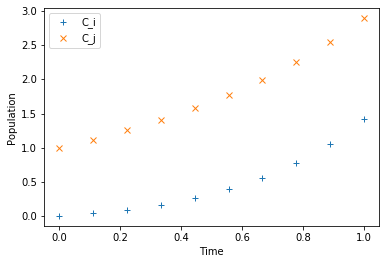

In [45]:
plt.plot(ts, resp1, "+", label="C_i")
plt.plot(ts, resp2, "x", label="C_j")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

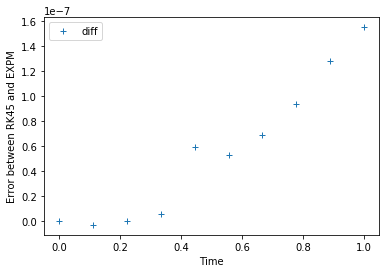

In [46]:
plt.plot(ts, prey-resp1, "+", label="diff")
plt.xlabel("Time")
plt.ylabel("Error between RK45 and EXPM")
plt.legend();

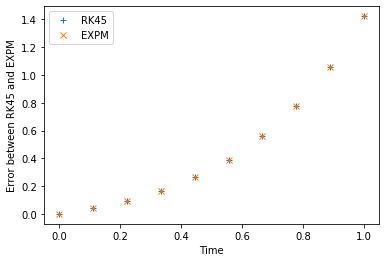

In [47]:
plt.plot(ts, prey, "+", label="RK45")
plt.plot(ts, resp1, "x", label="EXPM")
plt.xlabel("Time")
plt.ylabel("Error between RK45 and EXPM")
plt.legend();